# Imports

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [136]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/spectral_clustering-02.csv')
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,True_Label
0,7.789964,-5.235105,1.424628,1.068687,2.011908,-0.743746,2.557876,-1.396182,2.851415,-1.223220,3
1,-0.652092,-1.079087,2.500900,-2.264112,-2.845666,0.509525,3.049266,-2.305282,-0.699452,-0.160419,2
2,-0.192699,-0.777947,-1.497447,1.563696,0.056435,0.503472,0.772730,-0.323694,0.151855,-0.190241,1
3,2.704318,-2.612159,1.498098,-0.549100,-0.257756,-0.621846,1.874216,-1.528443,-0.038131,1.171810,1
4,2.153789,-0.594128,-0.980062,-2.655125,0.765364,-1.106970,-1.673205,1.993939,-1.364252,1.271065,0
...,...,...,...,...,...,...,...,...,...,...,...
795,1.122275,0.312543,-0.353686,-1.030757,-0.232708,-3.966573,-3.221092,-0.073074,0.168450,-1.055639,2
796,0.335554,-0.328932,-0.705773,1.534167,1.362088,0.190932,-0.493262,0.697260,-0.438148,-1.820760,0
797,1.034383,-2.071637,-0.150614,1.509175,1.381930,1.745199,2.997388,-1.318995,-1.921996,-0.503570,0
798,0.440137,-0.430859,-0.444807,-1.287307,0.047068,1.415868,2.966608,-2.052930,-1.335192,0.690911,2


In [137]:
# Separate features and true labels (labels are used for evaluation only)

X = df.iloc[:,:-1].values
true_labels = df["True_Label"].values

X

array([[ 7.78996352, -5.23510498,  1.42462773, ..., -1.39618167,
         2.85141529, -1.22322023],
       [-0.65209168, -1.07908738,  2.5009005 , ..., -2.30528176,
        -0.69945204, -0.16041938],
       [-0.19269885, -0.77794688, -1.49744667, ..., -0.32369404,
         0.15185542, -0.19024084],
       ...,
       [ 1.03438329, -2.07163671, -0.15061401, ..., -1.31899483,
        -1.92199637, -0.50356962],
       [ 0.44013696, -0.43085891, -0.44480684, ..., -2.05292964,
        -1.33519219,  0.69091096],
       [ 2.49301596, -0.88597844,  0.29879778, ..., -1.39195969,
         1.16199817,  0.97372623]])

In [138]:
# Standardizing the features is often useful in clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 2.27908269, -2.78409901,  1.45882956, ..., -0.32913283,
         1.76355837, -1.18592372],
       [-0.64288818, -0.10151322,  2.52685813, ..., -0.89510024,
        -0.23207572, -0.12339219],
       [-0.48388277,  0.09286402, -1.4408619 , ...,  0.33855277,
         0.24637026, -0.1532061 ],
       ...,
       [-0.05916412, -0.7421743 , -0.10434592, ..., -0.28107956,
        -0.91916169, -0.46645547],
       [-0.26484513,  0.31689898, -0.39628524, ..., -0.73799644,
        -0.58937003,  0.72772242],
       [ 0.44569898,  0.02313286,  0.34162341, ..., -0.32650441,
         0.81408375,  1.01046603]])

In [139]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state = 42)
X_pca = pca.fit_transform(X_scaled)

explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio
X_pca

array([[-1.67091027,  3.11299774,  1.20243951],
       [ 1.82431356,  0.73706243, -0.58838148],
       [ 0.63958617, -0.39060728,  0.08708397],
       ...,
       [ 0.89622798,  1.20923315, -0.67754891],
       [ 1.26379885,  0.86875572, -0.58609548],
       [-0.50749877,  0.14654099,  0.83860824]])

In [140]:
# Visualization (3D)

import plotly.express as px

fig = px.scatter_3d(X_pca, x = X_pca[:,0],
                    y = X_pca[:,1], z = X_pca[:,2], opacity = 0.8, title = '3D Scatter Plot')
fig.show()


In [141]:
# Apply Spectral Clustering
# affinity ='nearest_neighbors' builds a similarity graph from k-nearest neighbors

spectral = SpectralClustering(
    n_clusters = 4,                # we know the dataset has 4 true groups
    affinity='nearest_neighbors', # build graph from k-NN
    n_neighbors = 10,               # reasonable default for this size
    assign_labels ='kmeans',
    random_state = 42
)
pred_labels = spectral.fit_predict(X_pca)

In [142]:
# Fit and assign the cluster labels

predicted_labels = spectral.fit_predict(X_scaled)
predicted_labels

array([3, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 1, 2, 2, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 2, 2, 2, 3, 1, 1, 3, 3, 0,
       0, 2, 0, 2, 3, 2, 2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 2, 2, 3, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 3, 2, 2, 0, 0, 2, 3,
       3, 0, 1, 0, 2, 2, 1, 0, 3, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 3, 0, 0,
       2, 0, 3, 0, 1, 3, 2, 2, 0, 1, 3, 2, 3, 2, 0, 2, 2, 0, 2, 1, 0, 1,
       1, 2, 3, 2, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1,
       2, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 3, 0, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 0, 1,
       2, 3, 2, 0, 2, 2, 0, 3, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 0, 0, 3, 3, 1, 1, 0, 2, 2,
       3, 2, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 3, 1, 0, 2, 2, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 0, 2, 0, 0, 2, 3, 1, 3, 0, 0, 1,

In [143]:
# Method 1: S-Scores
# Loop through different n_clusters and compute silhouette scores

from sklearn.metrics import silhouette_score

sil_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:

    model = SpectralClustering(
        n_clusters = n_clusters,
        affinity ='nearest_neighbors',
        assign_labels = 'kmeans',
        random_state = 42,
        n_neighbors = 10  # keep constant for now
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

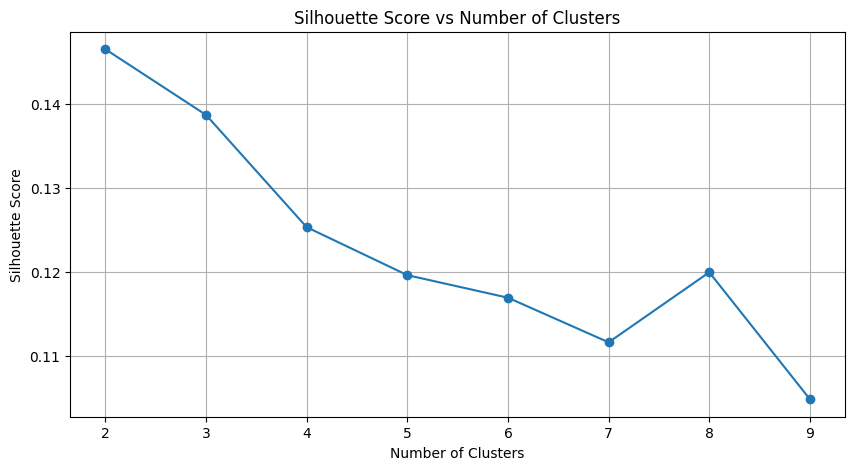

In [144]:
# Plot 1: Silhouette scores vs number of clusters

plt.figure(figsize = (10,5))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Peak at clusters → Strong candidates for the optimal number of clusters.

In [145]:
# Method 2: Eigen Gap Method

from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import spectral_embedding

# Construct similarity graph using kneighbors

connectivity = kneighbors_graph(X_scaled, n_neighbors=10, include_self = True)
laplacian_embedding = spectral_embedding(connectivity, n_components=10, random_state=42)
eigenvalues = np.linalg.norm(laplacian_embedding, axis=0)  # approximate eigenvalues by their norms

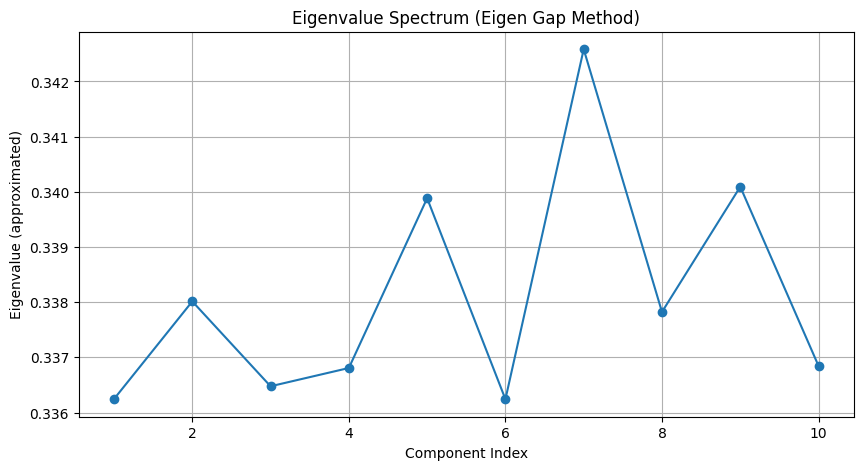

In [146]:
# Plot 2: Eigen Gaps

plt.figure(figsize = (10,5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Eigenvalue Spectrum (Eigen Gap Method)")
plt.xlabel("Component Index")
plt.ylabel("Eigenvalue (approximated)")
plt.grid(True)
plt.show()

# Look for a sudden jump ("gap") in the sorted eigenvalues.
# A sharp jump after the 4th eigenvalue suggests 4 clusters — confirming the silhouette analysis.

In [147]:
# Method for n_neighbors: Loop over different n_neighbors and compute silhouette scores

neighbors_range = range(5, 21)
neighbor_scores = []

for k in neighbors_range:

    model = SpectralClustering(
        n_clusters = 4, # identified clusters
        affinity='nearest_neighbors',
        assign_labels='kmeans',
        random_state=42,
        n_neighbors=k
    )

    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    neighbor_scores.append(score)

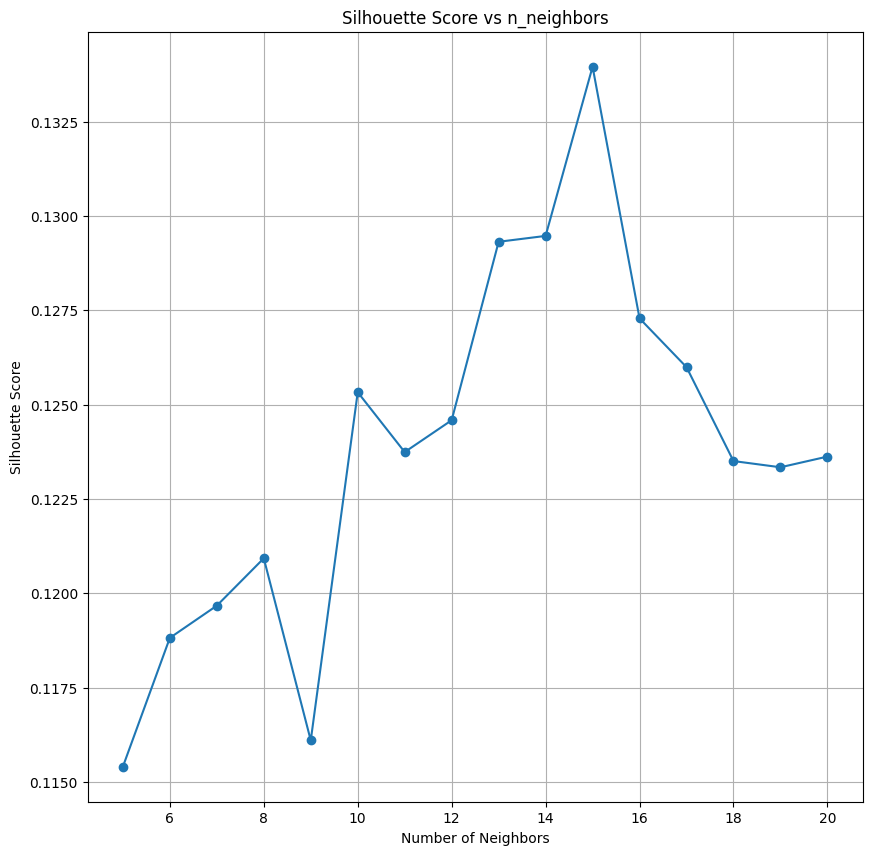

In [148]:
# Plot 3: Silhouette score vs n_neighbors

plt.figure(figsize = (10, 10))
plt.plot(neighbors_range, neighbor_scores, marker='o')
plt.title("Silhouette Score vs n_neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Scores increase dramatically when n_neighbors ≥ 12.
# Optimal n_neighbors is around 14 to 15, where the silhouette score peaks.

In [149]:
# Remodel

spectral_model = SpectralClustering(n_clusters = 4,
                                    affinity='nearest_neighbors', # can be 'discretize'
                                    assign_labels='kmeans',
                                    random_state = 42,
                                    n_neighbors = 15 # baseline only
                                    )

In [150]:
# Re-Fit and assign the cluster labels

predicted_labels = spectral_model.fit_predict(X_scaled)
predicted_labels

array([0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 2, 3, 3, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 3, 3, 3, 0, 2, 2, 0, 0, 3,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 1, 3, 1, 2,
       3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 1, 1, 3, 0,
       0, 1, 2, 1, 3, 3, 2, 1, 0, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 0, 1, 1,
       3, 1, 0, 1, 2, 0, 3, 3, 1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 2,
       2, 3, 1, 3, 3, 1, 1, 3, 1, 2, 1, 0, 1, 1, 1, 3, 2, 3, 1, 1, 3, 2,
       3, 0, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 3, 2, 2, 0, 3, 2, 2, 1, 3, 1,
       1, 3, 0, 1, 1, 1, 1, 0, 1, 3, 3, 3, 1, 1, 0, 3, 1, 1, 3, 0, 1, 2,
       3, 0, 3, 1, 3, 3, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 2,
       3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 3, 1, 1, 1, 1, 0, 2, 2, 1, 3, 3,
       0, 3, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 3, 1,
       3, 3, 3, 1, 1, 0, 2, 1, 3, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1,
       1, 1, 1, 0, 1, 3, 1, 1, 3, 0, 3, 0, 1, 1, 2,

In [151]:
# Optional

# Using Adjusted Rand Index to compare clustering with ground truth
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index: {ari_score:.3f}")

Adjusted Rand Index: 0.102


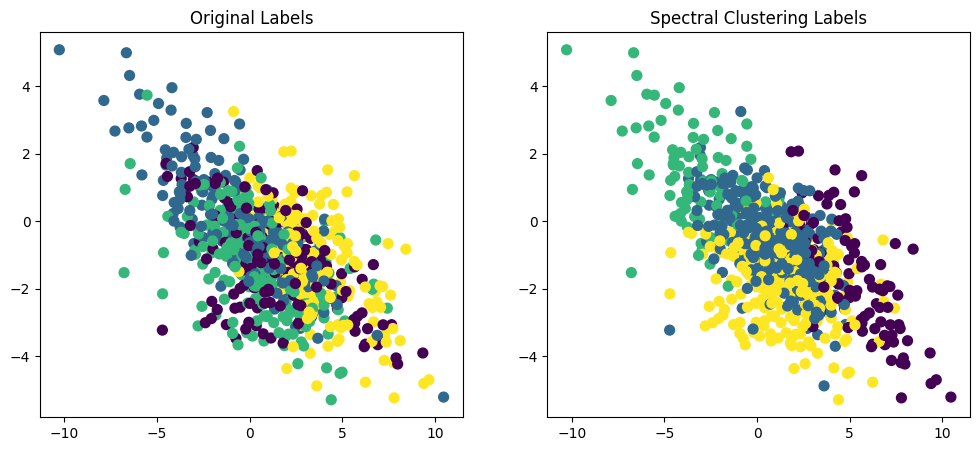

In [152]:
# Visualize the Results

# Plotting the original and clustered data side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original labels
axes[0].scatter(X[:, 0], X[:, 1], c = true_labels, s = 50)
axes[0].set_title("Original Labels")

# Predicted cluster labels
axes[1].scatter(X[:, 0], X[:, 1], c = predicted_labels, s = 50)
axes[1].set_title("Spectral Clustering Labels")

plt.show()

In [153]:
# Concat

components = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3'])
components

,PC1,PC2,PC3
0,-1.670910,3.112998,1.202440
1,1.824314,0.737062,-0.588381
2,0.639586,-0.390607,0.087084
3,-0.153478,1.140859,-0.395350
4,-1.626979,-1.070285,-1.539069
...,...,...,...
795,-1.558348,-1.866027,0.658329
796,-0.109230,-0.890489,0.208588
797,0.896228,1.209233,-0.677549
798,1.263799,0.868756,-0.586095


In [154]:
components['Clusters'] = true_labels
components

,PC1,PC2,PC3,Clusters
0,-1.670910,3.112998,1.202440,3
1,1.824314,0.737062,-0.588381,2
2,0.639586,-0.390607,0.087084,1
3,-0.153478,1.140859,-0.395350,1
4,-1.626979,-1.070285,-1.539069,0
...,...,...,...,...
795,-1.558348,-1.866027,0.658329,2
796,-0.109230,-0.890489,0.208588,0
797,0.896228,1.209233,-0.677549,0
798,1.263799,0.868756,-0.586095,2


In [155]:
components['Predicted Clusters'] = predicted_labels
components

,PC1,PC2,PC3,Clusters,Predicted Clusters
0,-1.670910,3.112998,1.202440,3,0
1,1.824314,0.737062,-0.588381,2,3
2,0.639586,-0.390607,0.087084,1,1
3,-0.153478,1.140859,-0.395350,1,3
4,-1.626979,-1.070285,-1.539069,0,0
...,...,...,...,...,...
795,-1.558348,-1.866027,0.658329,2,1
796,-0.109230,-0.890489,0.208588,0,1
797,0.896228,1.209233,-0.677549,0,3
798,1.263799,0.868756,-0.586095,2,3


In [156]:
# 3D Plot

import plotly.express as px

fig = px.scatter_3d(components, x = 'PC1',
                    y = 'PC2', z = 'PC3', color = 'Clusters', opacity = 0.8, title = 'Original Scatter Plot (with PCA)')
fig.show()

In [157]:
# 3D Plot (Predicted)

import plotly.express as px

fig = px.scatter_3d(components, x = 'PC1',
                    y = 'PC2', z = 'PC3', color = 'Predicted Clusters', opacity = 0.8, title = 'Predicted Labels Scatter Plot (with PCA)')
fig.show()